Epoch 1/10, Loss: 0.1781
Epoch 2/10, Loss: 0.1638
Epoch 3/10, Loss: 0.0257
Epoch 4/10, Loss: 0.0346
Epoch 5/10, Loss: 0.0147
Epoch 6/10, Loss: 0.0056
Epoch 7/10, Loss: 0.0026
Epoch 8/10, Loss: 0.0008
Epoch 9/10, Loss: 0.0002
Epoch 10/10, Loss: 0.0009
Training finished
Test Accuracy: 1.0000


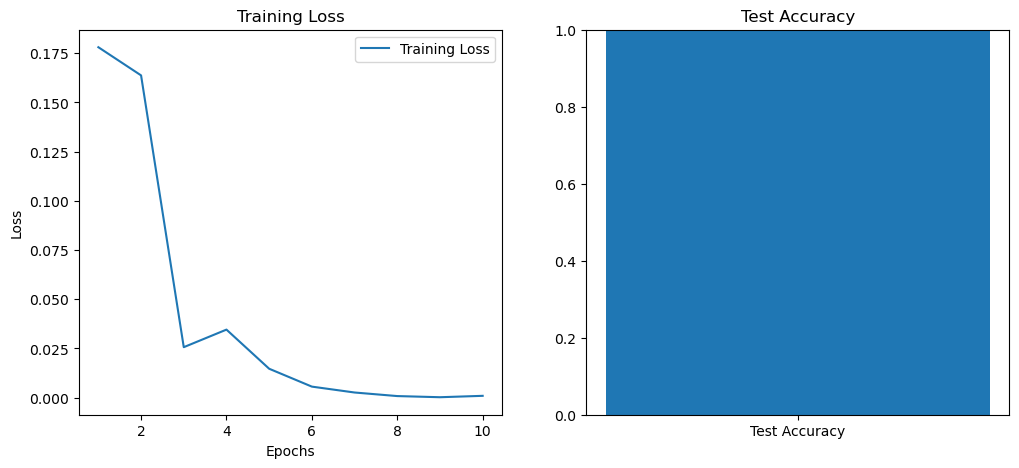

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms, models
import os
from PIL import Image
import random
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

uniform_dir = "./data/positive"
casual_dir = "./data/negative"
class UniformDataSet(Dataset):
    def __init__(self, uniform_dir, casual_dir, transform=None):
        self.uniform_dir = uniform_dir
        self.casual_dir = casual_dir
        self.uniform_images = [os.path.join(uniform_dir, f) for f in os.listdir(uniform_dir) if f.endswith(('jpg', 'png', 'jpeg'))]
        self.casual_images = [os.path.join(casual_dir, f) for f in os.listdir(casual_dir) if f.endswith(('jpg', 'png', 'jpeg'))]
        self.transform = transform
    
    def __len__(self):
        return max(len(self.uniform_images), len(self.casual_images))
    
    def __getitem__(self, idx):
        if random.random() > 0.5:
            img_path = random.choice(self.uniform_images)
            label = 1
        else:
            img_path = random.choice(self.casual_images)
            label = 0
        
        img = Image.open(img_path).convert('RGB')
        
        if self.transform:
            img = self.transform(img)
        
        return img, torch.tensor(label, dtype=torch.long)

# Define transformations for the training and validation sets
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# Load datasets
train_dataset = UniformDataSet(uniform_dir, casual_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# # Create dataloaders
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.features = models.resnet50(pretrained=True)
        self.features.fc = nn.Linear(self.features.fc.in_features, num_classes)

    def forward(self, x):
        x = self.features(x)
        return x
    
# Load the test dataset
test_dataset = UniformDataSet(uniform_dir, casual_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleCNN(num_classes=2).cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training function
def train_model(model, criterion, optimizer, train_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    print('Training finished')

# Training function with loss tracking
def train_model(model, criterion, optimizer, train_loader, num_epochs=10):
    train_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    print('Training finished')
    return train_losses

# Test function with accuracy tracking
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.cuda()
            labels = labels.cuda()

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# Train the model and get training losses
train_losses = train_model(model, criterion, optimizer, train_loader, num_epochs=10)

# Test the model and get test accuracy
test_accuracy = test_model(model, test_loader)

# Plot the training loss and test accuracy
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.bar(['Test Accuracy'], [test_accuracy])
plt.ylim(0, 1)
plt.title('Test Accuracy')

plt.show()

Epoch 1/10, Loss: 0.0550
Epoch 2/10, Loss: 0.0863
Epoch 3/10, Loss: 0.0080
Epoch 4/10, Loss: 0.0021
Epoch 5/10, Loss: 0.0042
Epoch 6/10, Loss: 0.0031
Epoch 7/10, Loss: 0.0018
Epoch 8/10, Loss: 0.0023
Epoch 9/10, Loss: 0.0043
Epoch 10/10, Loss: 0.0002
Training finished
Test Accuracy: 1.0000


NameError: name 'plt' is not defined

In [9]:
# Save the model
# torch.save(model.state_dict(), 'model.pth')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


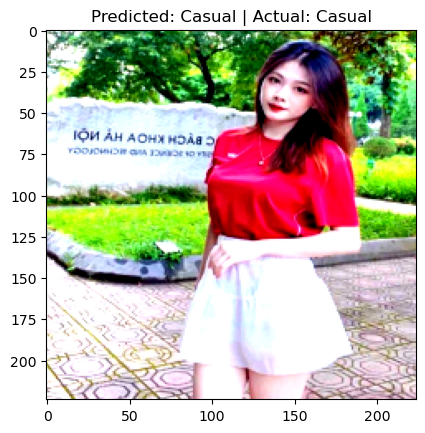

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


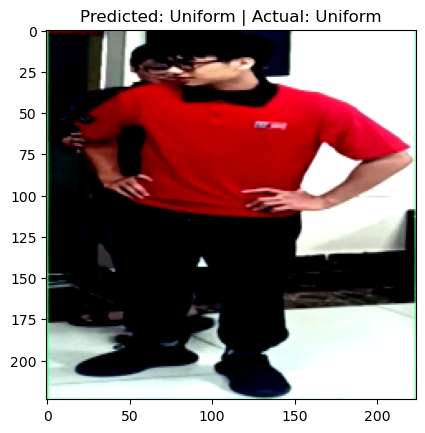

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


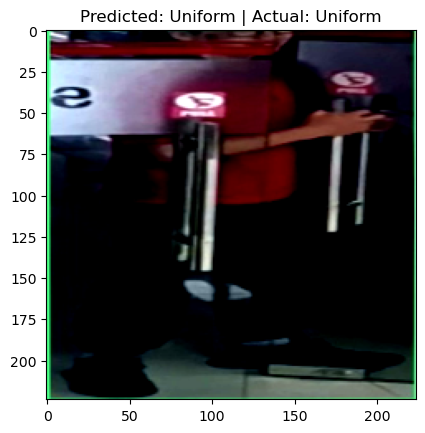

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


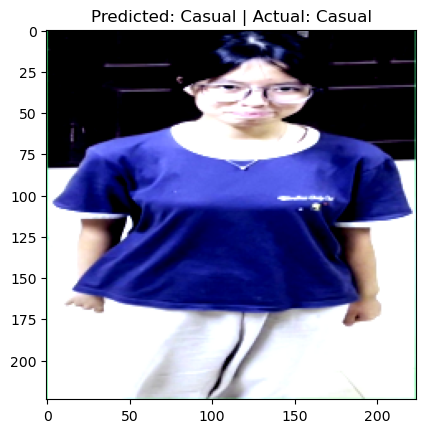

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


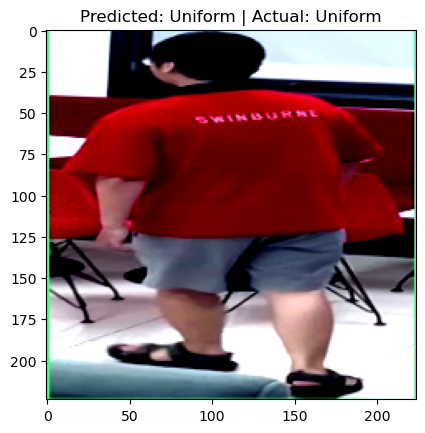

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# Function to show an image with its predicted label
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Function to get random predictions and plot them
def plot_predictions(model, dataset, num_images=5):
    model.eval()
    random_indices = random.sample(range(len(dataset)), num_images)
    
    for idx in random_indices:
        img, label = dataset[idx]
        input_img = img.unsqueeze(0).cuda()
        
        with torch.no_grad():
            output = model(input_img)
            _, predicted = torch.max(output.data, 1)
        
        imshow(img, f'Predicted: {"Uniform" if predicted.item() == 1 else "Casual"} | Actual: {"Uniform" if label == 1 else "Casual"}')

# Plot predictions
plot_predictions(model, test_dataset, num_images=5)
